# **An Introduction to Machine Learning**

In this module, we will introduce mathematical and intuition based explanation for concepts like Cost Function, Gradient Descent, Hyperparameter Tuning.

Over the course of the next modules, you will explore machine learning applications in physics, from astronomy to biophysics to high energy physics.

Here, we begin with a regression problem with Ohmic and Non-Ohmic Materials from scratch.

Most of these modules are writing down math, since most machine learning algorithms are just applied mathematics

## Physics Review

### Ohms Law Review

$$V = IR$$ where V is voltage, I is current and R is resistance.

By using a voltmeter and ammeter and measuring the varying voltage and currents across a resistance element, you can fit a line of best fit through these points. As a result, by using the slope, can determine the optimal resistance that represents this resistance element.



### Non-Ohmic Power Law

For Non-Ohmic materials, the underlying physics or governing equations are nonlinear. For a Tungsten filament light bulb, as the current passes through the filament, the light bulb warms changing the resistance of the element. The hypothesized governing equation is the power law.

$$ I = aV^b$$ where I is current, V is voltage, and a and b are coefficients that need to be determined.

# Experiment 1

We have provided sample data of measured current and voltage below and an implementation of how to determine the most optimal resistance and a, b coefficients using curve_fit function in sci-kit learn library

### Downloads Sample Voltage and Current Data from Resistor

In [ ]:
#Installing Dependencies/Libraries Needed

#Exclamation mark is needed to run terminal commands in Jupyter Notebook
# -q makes it so that the command is silent
%pip install -q gdown numpy pandas scikit-learn scipy matplotlib

#Can also use %%capture to make the command silent.
# %%capture
# !pip install gdown numpy pandas scipy matplotlib

Simulated Dataset in Case Student Has

In [ ]:
import gdown
import numpy as np
import random
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

#Sample Dataset if we don't want student to measure it. All of this is simulated/dataset found online.

voltage = np.array([1, 3.02, 5.04, 7.06, 9.08, 11.1, 13.12, 15.14, 17.16, 19.18, 21.2])
current = np.array([0.1, 0.3, 0.5, 0.71, 0.91, 1.11, 1.31, 1.51, 1.72, 1.92, 2.12])
voltage = voltage + random.uniform(-0.5, 0.5)
current = current + random.uniform(-0.05, 0.05)

voltage_unc = voltage*10**(-3) + random.uniform(-0.001, 0.001)
current_unc = voltage*10**(-3)*3 + random.uniform(-0.001, 0.001)

### Implement the Pythonic Scipy Optimize Curve Fit Function

In [ ]:
#Read documentation for function here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# Define model for Curve_Fit Function
def ohms(x, a):
    return a*x

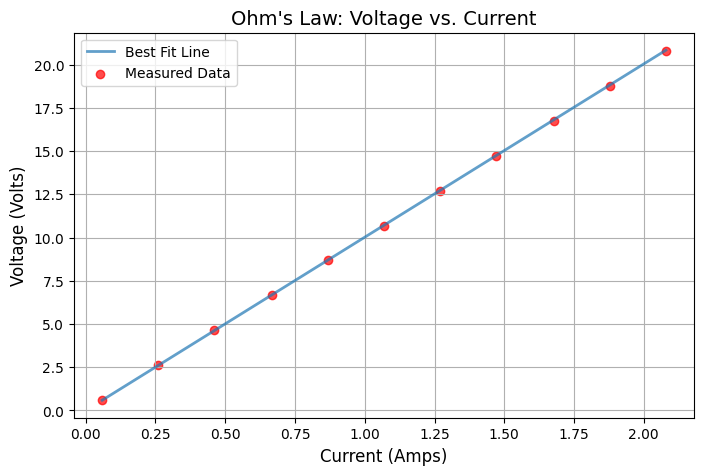

Optimal Resistance (Best Fit): 10.0227 Ohms


In [ ]:
# Fit the model to the data using curve_fit
# curve_fit returns:
# - popt: Optimal parameter values (best-fit resistance here)
# - pcov: Covariance matrix of the parameter estimates
popt, pcov = curve_fit(ohms, current, voltage, sigma=current_unc, absolute_sigma=True)

# Extract the optimal resistance value
resistance_opt = popt

# Compute predicted voltage values using the fitted model
voltage_predict = ohms(current, resistance_opt)

# Plot the data points and the line of best fit
plt.figure(figsize=(8, 5))
plt.title("Ohm's Law: Voltage vs. Current", fontsize=14)
plt.xlabel("Current (Amps)", fontsize=12)
plt.ylabel("Voltage (Volts)", fontsize=12)

# Plot the fitted model (line of best fit)
plt.plot(current, voltage_predict, label='Best Fit Line', alpha=0.7, linewidth=2)

# Plot the original data points
plt.scatter(current, voltage, label='Measured Data', alpha=0.7, color='red')

plt.legend()
plt.grid(True)
plt.show()

# Print the optimal resistance value
print(f"Optimal Resistance (Best Fit): {resistance_opt[0]:.4f} Ohms")

### Questions to Think About:

What does curve fit function do? How does it find the optimal coefficients? How does Excel or Python find the line of best fit?

## Cost Function

Cost function is a metric we use to determine how "well" our line of best fit fits the data points. There are a bunch of theoretical cost functions that work, and determining the "best" cost function to use will depend on the data you want to fit and the shape of the function you are trying to do regression on.

Some examples of cost functions are L1 (Manhattan Distance/Absolute Distance), L2 (Euclidian/Squared Distance), Root-Mean-Squared (Square Root of Squared Distance between points).


**IMPORTANT**

The loss function you choose is considered a hyperparameter, since it is not something that can be learned by gradient descent. You have to choose this before you can run your "learning algorithm".


**Question to Keep in Mind**

Why is choosing the loss function important?

### L2 Loss Function

L2 loss function is defined as $$J = \frac{1}{2n}\sum_{i = 1}^{n} (V^{actual}_i - V^{predicted}_i)^2$$

Where $V^{predicted} = R_{guess}*I_{actual}$.

We have measured the voltage, and the current, we don't know what resistance is. That is the variable or **parameter** we are trying to find. We don't know what the "best" R is as of right now, but we can find the "best" R.

We include the $\frac{1}{n}$ for normalization. The $\frac{1}{2}$ comes in later

Implement the total cost function for L2

In [ ]:
def cost(y_actual, x_actual, resistance):
    """
    Compute the cost (Mean Squared Error) for a linear model y = resistance * x.

    This matches the standard convention used for gradient descent, where the factor of 1/(2n)
    simplifies the gradient update rule.

    Parameters:
    ----------
    y_actual : np.ndarray
        Array of actual target values.
    x_actual : np.ndarray
        Array of input feature values.
    resistance/parameter : float
        Current value of the parameter (resistance) being optimized.

    Returns:
    -------
    float
        The computed cost value.
    """

### Visualizing Loss Function

In order to visualize our cost function, we will plot the cost function against the potential values that R could be. In general is a good technique to visualize your loss functions.

Iterate through varying values of resistance and compute cost for each one.

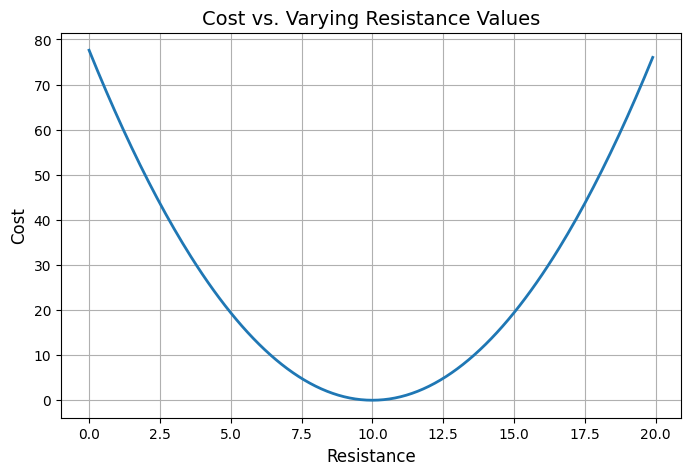

In [ ]:

 # List to store cost values
possible_resistances = np.arange(0, 20, 0.1)  # Resistance values from 0 to 20 (step 0.1)


# Convert list to numpy array (optional, good for consistency) If used Vectorization could just implement cost


# Plot Cost vs. Varying Resistance Values

Since we are varying R, we can write the cost function J, as J(R). Given this plot how do we find the best coefficient? Seems fairly obvious now that we can take a derivative and find the coefficient associated with the minimum cost. We chose a "good" cost function since a global minimum exists. There might be scenarios when your loss function might look something like:  

<div>
<img src="https://api.inverseai.com/media/blog_uploads/2020/10/07/localvsglobal1_J1oeY7g.png" width="500"/>
</div>


where there are multiple local minima for your cost function.

Is it the end of the world if your cost function has local minima? No, but its just something to consider. We will talk about how to adjust for this later.

**IMPORTANT**

If you keep getting a "line of best fit" that underperforms in terms of cost, might be because of your cost function choice.


## Learning Algorithm:  Gradient Descent

How can we update our weights automatically using code? How can we write code so that it finds and spits out the best coefficient?

We introduce the concept of learning algorithms. Learning algorithms, hopefully, find the "best parameter" by finding the parameter associated with the "minimal cost". There are a bunch of learning algorithms that you can look up but the most basic one we will implement here is called **Gradient Descent**

### Intuition

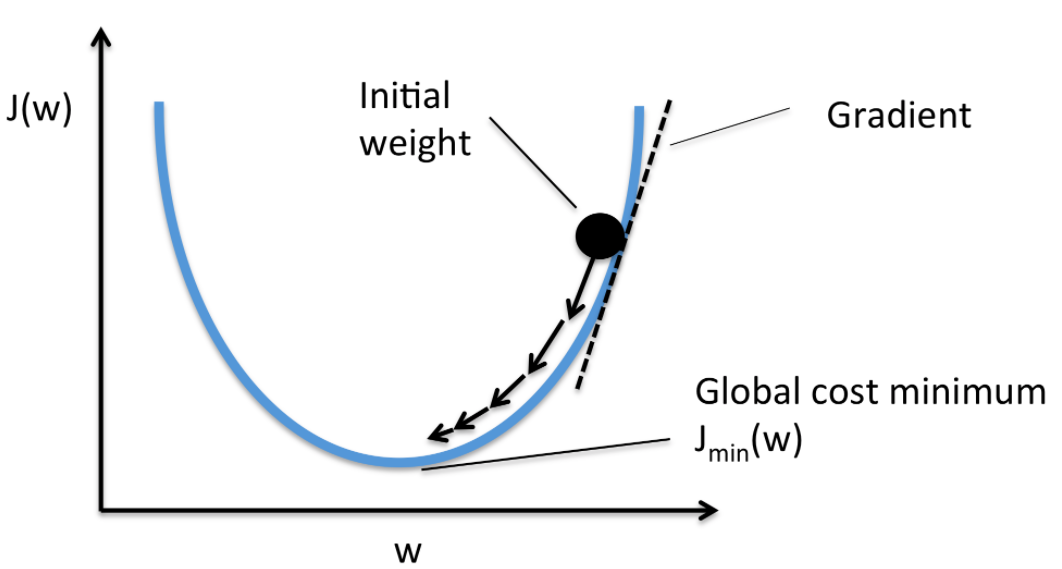


1.   We start off with an initial guess of our parameter. Standard practice is to set the parameter initially as a random value. This is called **Random Initialization.**

2.  Once we have our initial guess of parameter, we take the derivative of the cost function with respect to the parameter to see if the slope is nonzero.

3. If it is, we adjust the parameter based on the slope tangent to that point. Update the parameter so that its closer to a slope that is zero.  

4. Then we repeat taking the derivative and redo part 2 and 3, until it **converges**

**IMPORTANT**

The condition upon which this algorithm stops is a hyperparameter. Maybe you want the algorithm to stop only when you find a parameter such that the cost function equates to 0. (Kinda dumb) Maybe the algorithm stops after 1000 times you've updated the parameter (Plausible). Maybe the algorithm stops once the new cost  with the newly updated parameter is greater than the previous cost. (Plausible). Maybe the algorithm stops once the cost function is below a certain threshold (Plausible).

Something to consider when your line of best fit is underperforming.

### Math

This is the math/algorithm:

$\text{loop until convergence \{} \\
\theta_i := \theta_i - \alpha*\frac{\partial}{\partial{\theta_i}}J(\theta_0, \theta_1, \cdots , \theta_n)\\
\}$

*  $\theta_i$ are the current parameter we are working with, in general if we had n parameters to update, we would update each n parameters seperately.
*  $\alpha$ is called a learning rate. It is the magnitude for which we update our coefficient, and is assumed to be non-negative. That's why the minus sign
* $J$ is the cost function.


In English this algorithm says, keep updating the current parameter we have by taking the slope of the cost function with respect to the current parameter times a scaling factor.

**Question**

What should the algorithm look like for a cost function that depends on one parameter?

Answer: ?

What should the algorithm look like for a cost function that depends on two parameters?

Answer: ?

**IMPORTANT**

Learning Rate is a hyperparameter. If you see hyperparameter, its probably important. Again, if your line of best fit is underperforming, then consider adjusting the magnitude of the learning rate. This will be explained more in detial later.

Implement the algorithm above. We have provided some helper function. For the condition to converge on, make it after the parameter is updated 1000 times. Epochs is another way to say number of times.

In [ ]:
def derivative(y_actual, x_actual, parameter):
    """
    Compute the derivative of the cost function with respect to the model parameter.

    The derivative is used in gradient descent to update the parameter value and minimize the cost.

    Parameters:
    ----------
    y_actual : np.ndarray
        The target/output values.
    x_actual : np.ndarray
        The input feature values.
    parameter : float
        The current value of the model parameter.

    Returns:
    -------
    float
        The computed derivative (gradient) value.
    """

Fill in the missing comment areas

In [ ]:
def grad(y_actual, x_actual, init_param, alpha, n_epochs=100):
    """
    Perform gradient descent to optimize the model parameter.

    This function iteratively updates the parameter value using gradient descent in order to
    minimize the cost function:

    At each iteration, the parameter is updated by moving in the direction opposite to the gradient
    of the cost function, scaled by the learning rate `alpha`.

    The function also tracks the parameter values and cost at each iteration for analysis.

    Parameters:
    ----------
    y_actual : np.ndarray
        The target/output values.
    x_actual : np.ndarray
        The input feature values.
    init_param : float
        The initial value of the model parameter (starting point for gradient descent).
    alpha : float
        The learning rate, which controls the size of each update step.
    n_epochs : int, optional (default=100)
        The number of iterations to run gradient descent.

    Returns:
    -------
    best_parameter : float
        The optimized parameter value after gradient descent.
    costs : np.ndarray
        Array of cost values recorded at each iteration (shape: n_epochs + 1).
    params : np.ndarray
        Array of parameter values recorded at each iteration (shape: n_epochs + 1).
    """

    n = x_actual.size
    parameter = init_param

    # Tracking lists
    params = [parameter]
    costs = [cost(y_actual, x_actual, parameter)]
    iterations = []
    minimum = float('inf')
    best_parameter = 0

    #for each iteration


      #Calculate the derivative of the cost function with a normalization coefficient

      #Update parameter with learning parameter and the gradient


      #Calculate the new cost after updating parameter

      # Append new update parameter and new cost to params list and costs lists

      #Find the the best parameter (i.e) the minimum cost.
      if minimum > temp_cost:

    #Check Docstring for return types
    return best_parameter, np.array(costs), np.array(params)

# Example usage:
resistance, costs, params = grad(voltage, current, init_param=5, alpha=0.1)

### Visualizing Loss History

How can we check if our learning algorithm is working?

We can plot the total cost vs epochs to see this. If it is decreasing overtime, then we know that learning algorithm is possibly working.

Plot Cost vs Epochs:

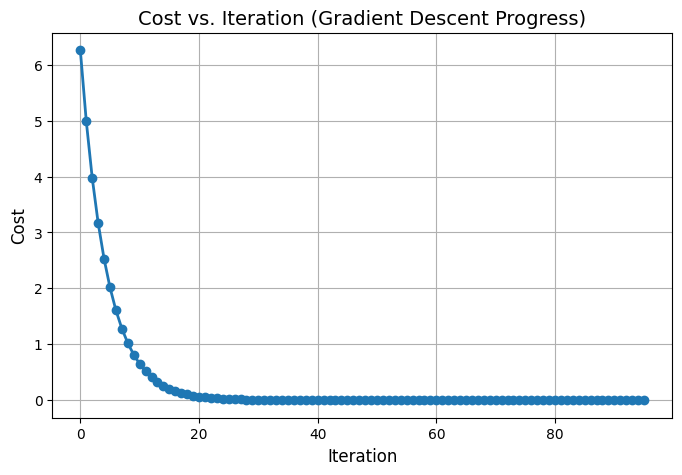

In [ ]:
#Plot Cost vs Iteration Overtime
plt.figure(figsize=(8, 5))


plt.show()

Plot log(cost) vs Epochs. Might cause error but don't fret, we will check the next section

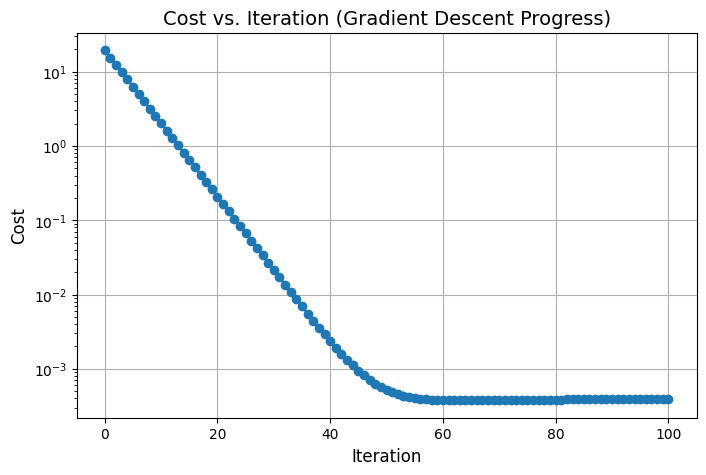

In [ ]:
plt.figure(figsize=(8, 5))

plt.show()

Plot Cost vs Parameters since the loss function is simple here.

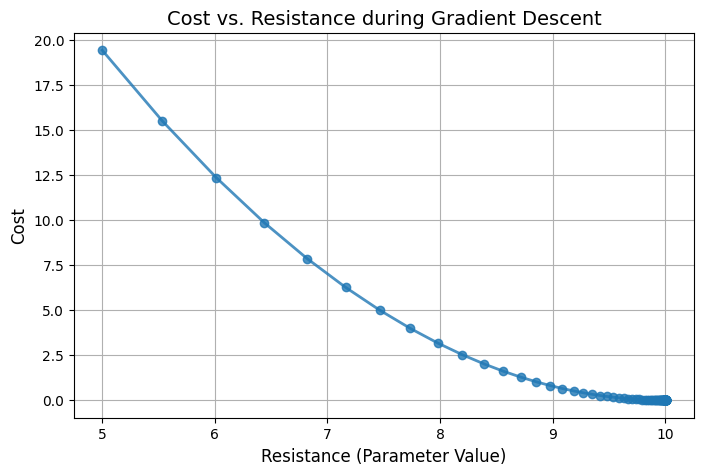

In [ ]:
#Plot Cost vs Parameters from teh gradient function above.
plt.figure(figsize=(8, 5))

plt.show()

## Learning Rate

Based on the learning rate you've chosen you have three different scenarios that could've happened. In this section we will try adjusting/changing the learning rate you have chosen.


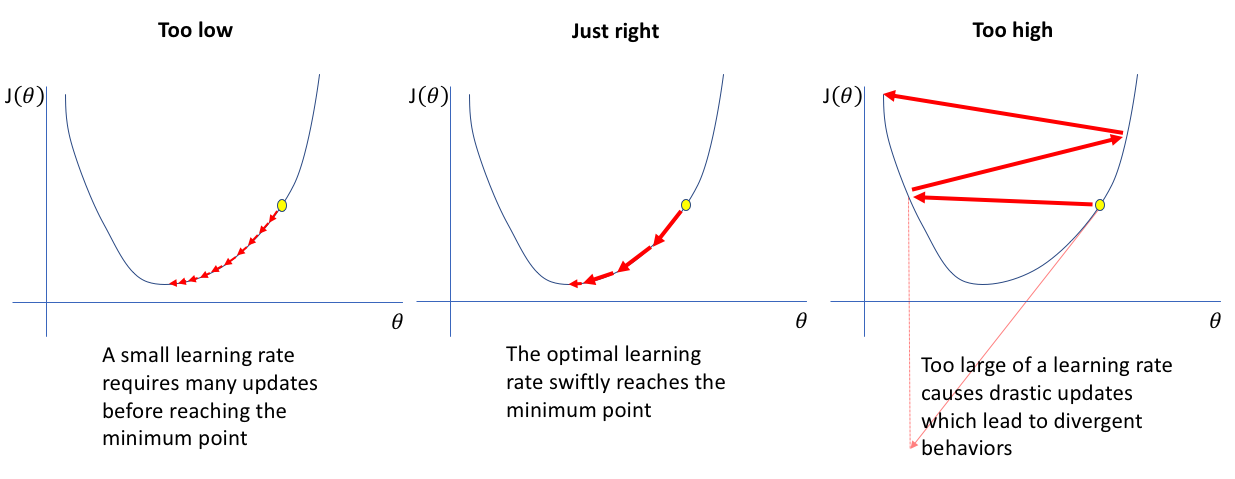



### Case 1: Too Small

If you chose too small of a learning rate, you are adjusting the parameter too slowly. You also might not have updated the coefficient enough to reach the minimum cost.

Try increasing the learning rate. Cost should be nearly 0.

### Case 2: Too Big

If its too big, you overshot the minimum cost. At which point, your cost function will explode towards infinity.

Try decreasing the learning rate.

### How to determine the sweet spot?

There are a bunch of methods to determine the sweet spot. We will implement a grid search method. Grid search method is looping through different magnitudes of the learning rate.

So set learning rate $\alpha$ to be 100 $\rightarrow$ 10 $\rightarrow$ 1 $\rightarrow$ 0.1 $\cdots$.

## Experiment

### If you got error, go back and adjust the learning rate

### If you did not get an error, adjust the learning rate to cause an error so you know what it looks like, and then go back

## Verify

### Since you have the best resistance, plot the line of best fit now.

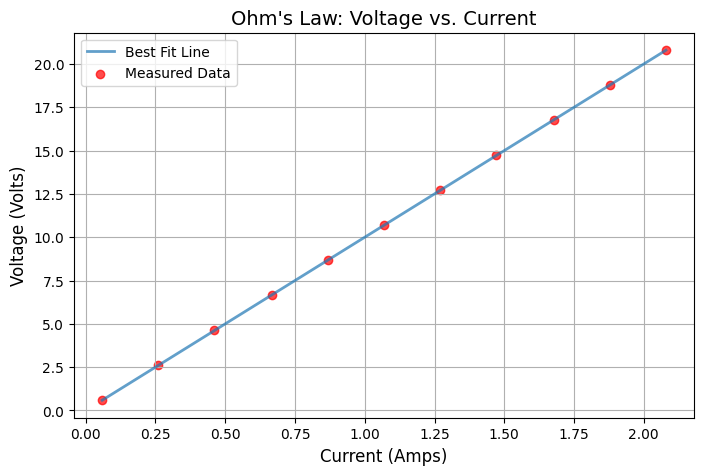

In [ ]:

voltage_predict = ohms(current, resistance)

# Plot the data points and the line of best fit
plt.figure(figsize=(8, 5))
plt.title("Ohm's Law: Voltage vs. Current", fontsize=14)
plt.xlabel("Current (Amps)", fontsize=12)
plt.ylabel("Voltage (Volts)", fontsize=12)

# Plot the fitted model (line of best fit)
plt.plot(current, voltage_predict, label='Best Fit Line', alpha=0.7, linewidth=2)

# Plot the original data points
plt.scatter(current, voltage, label='Measured Data', alpha=0.7, color='red')

plt.legend()
plt.grid(True)
plt.show()


### Try on your own time:

Experiment with different optimization algorithm

Experiment with different cost functions

Experiment with different convergence conditions

# Experiment 2

### You will implement gradient descent and cost function but two parameters now.

In [ ]:
import gdown
import numpy as np

url = 'https://drive.google.com/uc?id=1VRY7bTCuxepR4MRma8CRBtuP0vHJ_w5_'
output = 'voltage_data.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1VRY7bTCuxepR4MRma8CRBtuP0vHJ_w5_
To: /content/voltage_data.csv
100%|██████████| 492/492 [00:00<00:00, 1.60MB/s]


'voltage_data.csv'

In [ ]:
df = np.genfromtxt("/content/voltage_data.csv", delimiter = ',', skip_header=1)
VOLT = 0
VOLTUNC = 1
CURR = 2a
CURRUNC = 3

voltage = df[:, VOLT]
voltage_unc = df[:, VOLTUNC]
current = df[:, CURR] * 10**(-3)
current_unc = df[:, CURRUNC] * 10**(-3)


In [ ]:
def model(x, a, b):
    return a*(x**b)

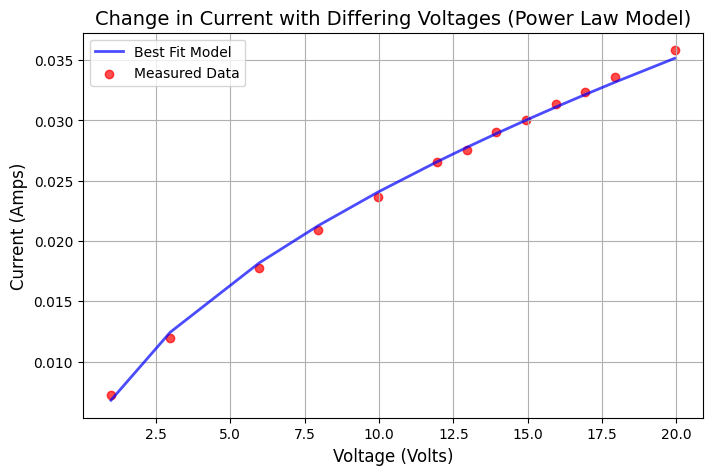

Optimal parameters:
a = 0.0068
b = 0.5467


In [ ]:
# Fit the model to the data using curve_fit
# Now assuming model has the form: model(voltage, a, b)
# - popt: optimal parameters [a, b]
# - pcov: covariance matrix of parameter estimates

popt, pcov = curve_fit(model, voltage, current, sigma=current_unc, absolute_sigma=True)

# Extract parameters
a, b = popt

# Compute predicted current using the fitted model
current_predict = model(voltage, a, b)

# Plot the original data points and the fitted model
plt.figure(figsize=(8, 5))
plt.title("Change in Current with Differing Voltages (Power Law Model)", fontsize=14)
plt.xlabel("Voltage (Volts)", fontsize=12)
plt.ylabel("Current (Amps)", fontsize=12)

# Plot the fitted curve
plt.plot(voltage, current_predict, label='Best Fit Model', color='blue', linewidth=2, alpha=0.7)

# Plot the actual data points
plt.scatter(voltage, current, label='Measured Data', color='red', alpha=0.7)

plt.legend()
plt.grid(True)
plt.show()

# Print the optimal parameters
print(f"Optimal parameters:\na = {a:.4f}\nb = {b:.4f}")


### Define an appropriate cost function:

In [ ]:
#Implement Cost Function Here:
def cost(y_actual, x_actual, coefficient0, coefficient1):
    """
    Compute the cost (Mean Squared Error) for the power-law model:

    Parameters
    ----------
    y_actual : np.ndarray
        Array of actual target values.
    x_actual : np.ndarray
        Array of input feature values.
    coefficient1 : float
        Parameter a in the model y = a * x^b.
    coefficient2 : float
        Parameter b in the model y = a * x^b.

    Returns
    -------
    float
        The computed cost value.
    """

### Visualizing Cost function vs Coefficients

In [ ]:
# Define the range of coefficients to explore
possible_coefficient1 = np.arange(-10, 10, 0.01)
possible_coefficient2 = np.arange(-10, 10, 0.01)

# Create meshgrid for plotting
coefficient1_grid, coefficient2_grid = np.meshgrid(possible_coefficient1, possible_coefficient2)

# Initialize cost grid with the same shape as meshgrid
tc_grid = np.zeros_like(coefficient1_grid)

# Compute cost for each combination of coefficient1 and coefficient2
for i in range(coefficient1_grid.shape[0]):
    for j in range(coefficient1_grid.shape[1]):
        a = coefficient1_grid[i, j]
        b = coefficient2_grid[i, j]
        tc_grid[i, j] = cost(current, voltage, a, b)

# Plot 3D surface of Cost vs Coefficient1 and Coefficient2
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(coefficient1_grid, coefficient2_grid, tc_grid, cmap='viridis', alpha=0.9)

# Set viewing angle
ax.view_init(elev=20, azim=80)

# Labels
ax.set_xlabel('Coefficient 1 (a)', fontsize=12)
ax.set_ylabel('Coefficient 2 (b)', fontsize=12)
ax.set_zlabel('Cost', fontsize=12)
ax.set_title("Cost Surface for Power Law Model", fontsize=14)

plt.tight_layout()
plt.show()


NameError: name 'np' is not defined

### Implement a gradient descent function that returns a numpy list of the cost and a numpy list of the two parameter changes. Hint: You will have to update two parameters. You can do it like odd steps is one parameter, even steps is another. If you want to update two parameters in the same

In [ ]:
#Implement Gradient Descent Here: Hint: I would calculate the derivative and then
def derivative_coeff0(y_actual, x_actual, coefficient0, coefficient1):
    """
    Compute the partial derivative of the cost function with respect to coefficient0 (parameter a).

    The model is:
        y = coefficient0 * x_actual ** coefficient1

    The cost function is:
        J(coefficient0, coefficient1) = (1 / (2n)) * sum((y_actual - coefficient0 * x_actual ** coefficient1) ** 2)

    The partial derivative with respect to coefficient1 is:
        dJ/d(coefficient1) =

    Parameters
    ----------
    y_actual : np.ndarray
        Array of actual target values.
    x_actual : np.ndarray
        Array of input feature values.
    coefficient0 : float
        Current value of coefficient0 (parameter a).
    coefficient1 : float
        Current value of coefficient1 (parameter b).

    Returns
    -------
    float
        The computed partial derivative of the cost with respect to coefficient0.
    """

def derivative_coeff1(y_actual, x_actual, coefficient0, coefficient1):
    """
    Compute the partial derivative of the cost function with respect to coefficient1 (parameter b).

    The model is:
        y = coefficient0 * x_actual ** coefficient1

    The cost function is:
        J(coefficient0, coefficient1) = (1 / (2n)) * sum((y_actual - coefficient0 * x_actual ** coefficient1) ** 2)

    The partial derivative with respect to coefficient1 is:
        dJ/d(coefficient1) =

    Parameters
    ----------
    y_actual : np.ndarray
        Array of actual target values.
    x_actual : np.ndarray
        Array of input feature values.
    coefficient0 : float
        Current value of coefficient0 (parameter a).
    coefficient1 : float
        Current value of coefficient1 (parameter b).

    Returns
    -------
    float
        The computed partial derivative of the cost with respect to coefficient1.
    """

In [ ]:
def grad(y_actual, x_actual, init_coeff0, init_coeff1, alpha1=0.001, alpha2 = 0.0001, steps=1000):
    """
    Perform gradient descent to optimize both coefficients of the power-law model:
        y = coeff0 * x ** coeff1

    Parameters
    ----------
    y_actual : np.ndarray
        Target values.
    x_actual : np.ndarray
        Input feature values.
    init_coeff0 : float
        Initial value of coefficient0 (parameter a).
    init_coeff1 : float
        Initial value of coefficient1 (parameter b).
    alpha : float
        Learning rate.
    steps : int
        Number of iterations to perform.

    Returns
    -------
    best_coeff0 : float
        best coefficient0 value.
    best_coeff1 : float
        best coefficient1 value.
    cost_history : np.ndarray
        History of cost values over iterations.
    """
    n = x_actual.size

    coeff0 = init_coeff0
    coeff1 = init_coeff1

    minimum_cost = float("inf")
    best_coeff0 = 0
    best_coeff1 = 0

    cost_history = [cost(y_actual, x_actual, coeff0, coeff1)]

    for epoch in range(steps):

        #Calculate the gradient for both coefficients. You are going to need two variables.


        #Update both coefficient1 and coefficient0


        # Calculate new cost after updating both coefficient0 and coefficient1

        #Store new cost and append to cost_history.

        #Find the minimum cost and the corresponding best coefficient0 and coefficient1

    return best_coeff0, best_coeff1, np.array(cost_history)

In [ ]:
init_coeff0 = 1.0
init_coeff1 = 1.0
alpha1 = 0.01
alpha2 = 0.001
steps = 10000

#Try changing alpha1 and alpha2. They don't have to equal each other. Also alpha1 > alpha2 from what we have tried.
#Hyperparameter tuning is quite arbitrary. There are methods to search for best parameters like grid search. There is also random search
#If you have free time, you can make a list of alpha1 values and alpha2 values and try running gradient descent
#But again

# Run gradient descent
coeff0, coeff1, cost_history = grad(
    current, voltage, init_coeff0, init_coeff1, alpha1=alpha1, alpha2 = alpha2, steps=steps
)

Graph the cost function with respect to one parameter, and then with respect to another parameter. If you want you can graph a 3D plot.

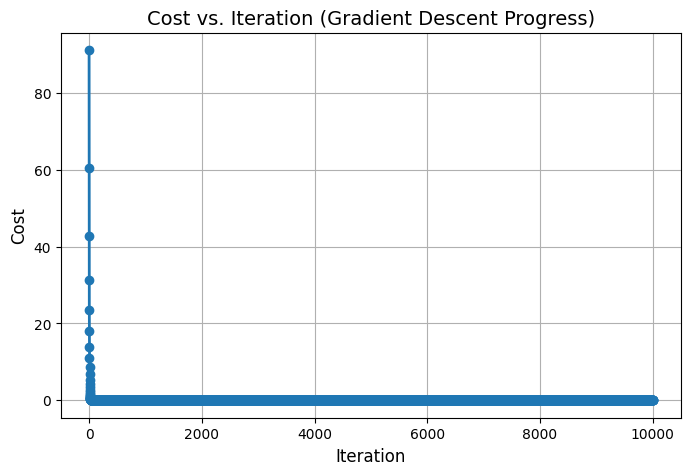

In [ ]:
#Plot Cost vs Iterations
plt.figure(figsize=(8, 5))

plt.show()

In [ ]:
#Compare coeff0
print(coeff0)
print(coeff1)

0.008240615120227803
0.476136198239586


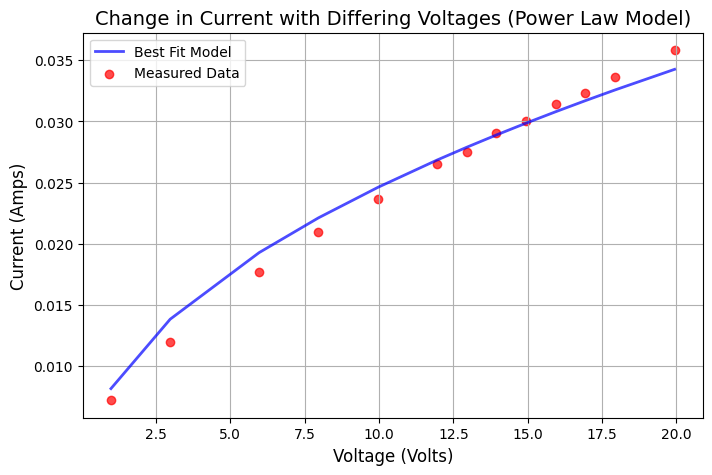

In [ ]:
# Compute predicted current using the fitted model
current_predict = model(voltage, coeff0, coeff1)

# Plot the original data points and the fitted model
plt.figure(figsize=(8, 5))
plt.title("Change in Current with Differing Voltages (Power Law Model)", fontsize=14)
plt.xlabel("Voltage (Volts)", fontsize=12)
plt.ylabel("Current (Amps)", fontsize=12)

# Plot the fitted curve
plt.plot(voltage, current_predict, label='Best Fit Model', color='blue', linewidth=2, alpha=0.7)

# Plot the actual data points
plt.scatter(voltage, current, label='Measured Data', color='red', alpha=0.7)

plt.legend()
plt.grid(True)
plt.show()


### Adjust learning rate or adjust epochs and repeat

### This was the best I could do, so issues with current implementation

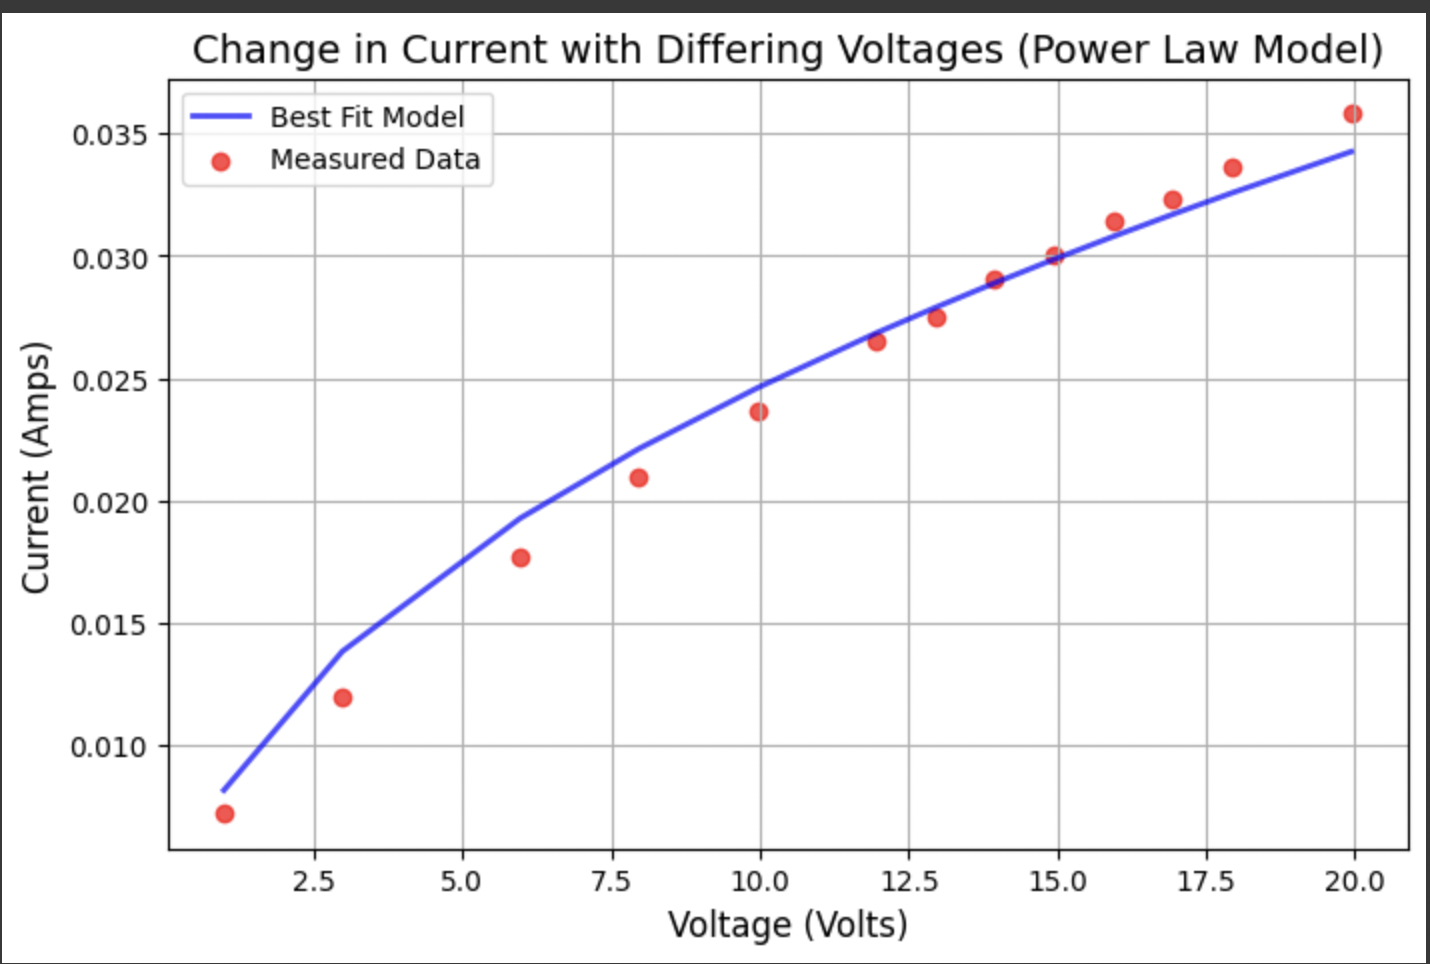

### Compare with the a, b found by curve_fit function from sci-kit learn. We will assume sci-kit learn curve_fit as ground truth